In [71]:
from lowres_MVEE import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##### Generate some 2D test data

In [72]:
# np.random.seed(42)
nD = 2
n_pts = 100
pts = np.vstack((np.random.randn(1,n_pts), 0.2*np.random.randn(1,n_pts)))

##### Compute the MVEE using Khachiyan's Algorithm

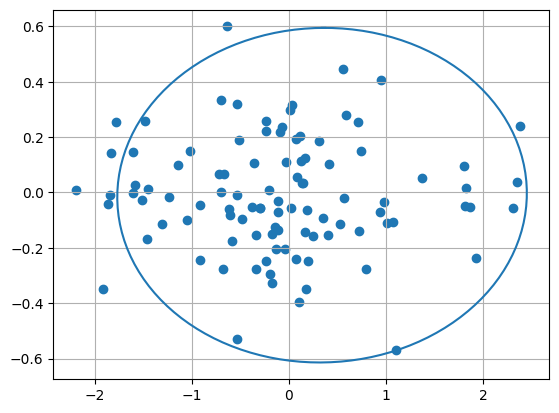

In [73]:
A, c = min_vol_ellipse(pts,tolerance=1e-2)
[D, P] = np.linalg.eig(A)
radii = 1 / np.sqrt(D)

fig, ax = plt.subplots()
scatter_nD(pts.T,ax)
ellipse_plot(A,c,ax)
ax.grid('true')
# ax.axis('equal')
plt.show()

Notice how it's not bounding. We need to address this first.

#### Scale this MVEE so that it actually encloses the points

Undo the transformation defined by (A,c) s.t. the ellipse is mapped to the unit circle. Apply this same transformation to our data.

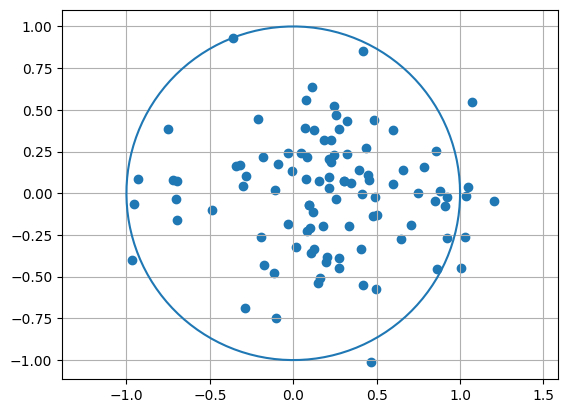

In [74]:
tm = np.diagflat(np.sqrt(D)) @ P.T
pts_mapped_to_unit_sphere = tm @ (pts-c)

fig, ax = plt.subplots()
ax.grid('true')
ax.axis('equal')
scatter_nD(pts_mapped_to_unit_sphere.T,ax)
ellipse_plot(np.eye(2),np.array([0,0]),ax)
plt.show()

Scale the unit circle so it encompasses the points.

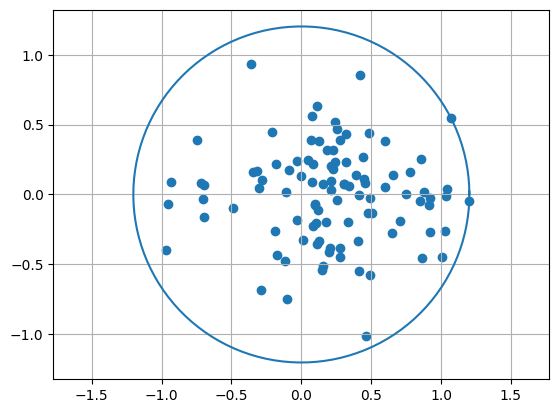

In [75]:
radial_scaling_to_correct_undershoot = np.max(np.linalg.norm(pts_mapped_to_unit_sphere,axis=0))
A_sf = 1/radial_scaling_to_correct_undershoot**2

fig, ax = plt.subplots()
ax.grid('true')
ax.axis('equal')
scatter_nD(pts_mapped_to_unit_sphere.T,ax)
ellipse_plot(A_sf*np.eye(2),np.array([0,0]),ax)
plt.show()

Apply the scaling factor to the ellipse

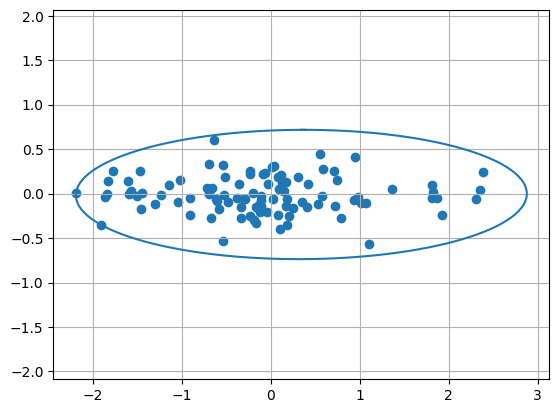

In [76]:
new_D = A_sf * D
new_D = np.diagflat(new_D)

fig, ax = plt.subplots()
ax.grid('true')
ax.axis('equal')
scatter_nD(pts.T,ax)
ellipse_plot(P @ new_D @ P.T, c, ax)
plt.show()

#### Compute the low-res polyhedron that bounds the corrected ellipse

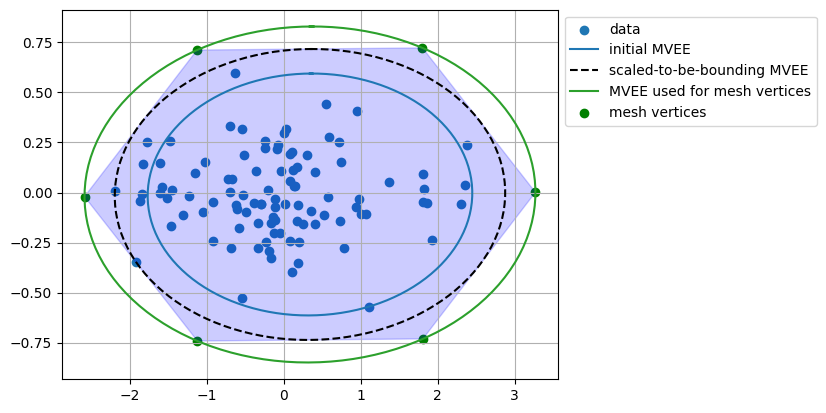

In [77]:
mesh_density = 4
V = get_mesh_vertices(nD,mesh_density) # polyhedron coordinates on a unit sphere
D_sf = scaling_factor(2,mesh_density) * 1/np.sqrt(A_sf)

D_diag = np.diagflat(D)
D_sqrt_inv = np.diagflat([1/np.sqrt(D[i]) for i in range(len(D))])
tm = P @ (D_sf * D_sqrt_inv)
V = (tm @ V.T) + c

fig, ax = plt.subplots()
ax.grid('true')
# ax.axis('equal')
scatter_nD(pts.T,ax)
ellipse_plot(A, c, ax)
ellipse_plot(A_sf * A, c, ax)
ellipse_plot(1 / D_sf**2 * A, c, ax)
scatter_nD(V.T,ax)
plot_polyhedron(V.T,ax)
ax.lines[1].set_color('black')
ax.lines[1].set_linestyle('--')
ax.collections[1].set_color('green')

ax.legend(['data','initial MVEE','scaled-to-be-bounding MVEE','MVEE used for mesh vertices','mesh vertices'], loc="upper left", bbox_to_anchor=(1, 1))
plt.show()